In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing, SimpleExpSmoothing
from sklearn import linear_model
pd.options.mode.chained_assignment = None  # default='warn'


In [104]:
#Load Base Dataser
demo = pd.read_csv('demographics.csv')
pop = pd.read_csv('pop.csv')
demo.head()

,Year,Country of origin,Country of origin (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,Female total,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 18 - 59,Male 60,Male total,Total
0,2001,Afghanistan,AFG,192136,0,0,581881,40530,1385962,195434,0,0,782771,57368,1643930,5109754
1,2001,Albania,ALB,0,0,0,15,0,451,0,0,0,9,0,662,7625
2,2001,Algeria,DZA,0,0,0,34,0,350,11,0,0,93,0,680,8399
3,2001,Angola,AGO,12216,0,0,27384,2117,74574,11412,0,0,22973,1826,73374,672618
4,2001,Antigua and Barbuda,ATG,0,0,0,0,0,0,0,0,0,0,0,0,5


In [105]:
demo_scaled = demo.join(pop.set_index('Country Code'), on = 'Country of origin (ISO)')

In [106]:
df = demo_scaled[['Year', 'Country of origin','Country of origin (ISO)', 'Female total','Male total', 'Total', '2019']]
df.head()

,Year,Country of origin,Country of origin (ISO),Female total,Male total,Total,2019
0,2001,Afghanistan,AFG,1385962,1643930,5109754,38041754.0
1,2001,Albania,ALB,451,662,7625,2854191.0
2,2001,Algeria,DZA,350,680,8399,43053054.0
3,2001,Angola,AGO,74574,73374,672618,31825295.0
4,2001,Antigua and Barbuda,ATG,0,0,5,97118.0


In [107]:
demo_scaled['female'] = demo_scaled['Female total'] / (demo_scaled['2019']/1000000)
demo_scaled['male'] = demo_scaled['Male total'] / (demo_scaled['2019']/1000000)
demo_scaled['total'] = demo_scaled['Total'] / (demo_scaled['2019']/1000000)


demo_scaled = demo_scaled.rename(columns={'2019':'pop'})
demo_scaled.head()

,Year,Country of origin,Country of origin (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,Female total,Male 0 - 4,...,Male 12 - 17,Male 18 - 59,Male 60,Male total,Total,Country Name,pop,female,male,total
0,2001,Afghanistan,AFG,192136,0,0,581881,40530,1385962,195434,...,0,782771,57368,1643930,5109754,Afghanistan,38041754.0,36432.652396,43213.832885,134319.621540
1,2001,Albania,ALB,0,0,0,15,0,451,0,...,0,9,0,662,7625,Albania,2854191.0,158.013251,231.939628,2671.510071
2,2001,Algeria,DZA,0,0,0,34,0,350,11,...,0,93,0,680,8399,Algeria,43053054.0,8.129505,15.794466,195.084883
3,2001,Angola,AGO,12216,0,0,27384,2117,74574,11412,...,0,22973,1826,73374,672618,Angola,31825295.0,2343.230440,2305.524584,21134.698044
4,2001,Antigua and Barbuda,ATG,0,0,0,0,0,0,0,...,0,0,0,0,5,Antigua and Barbuda,97118.0,0.000000,0.000000,51.483762


In [128]:
df2= demo_scaled[['Year', 'Country of origin (ISO)', 'total']]

In [108]:
PPP = pd.read_csv('PPP.csv')
PPP.head()

,Country Name,ISO,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,20669.031970,20436.887130,20833.761610,22569.974990,23300.039560,24045.272480,25835.132670,27084.703690,...,23512.602600,24985.993280,24713.698050,26189.435510,26647.938100,27980.880700,28281.350480,29007.693000,NaN,NaN
1,Afghanistan,AFG,NaN,179.426611,190.683814,211.382117,242.031285,263.733692,359.693238,364.660745,...,543.303042,591.162759,641.871479,637.165523,613.856689,578.466353,509.218661,519.884773,493.750418,507.103432
2,Angola,AGO,527.333529,872.494492,982.960899,1255.564045,1902.422346,2599.566464,3121.995637,4080.941410,...,3587.883798,4615.468028,5100.095808,5254.882338,5408.410496,4166.979684,3506.072885,4095.812942,3289.646664,2790.726615
3,Albania,ALB,1281.659393,1425.124849,1846.118813,2373.579844,2673.787283,2972.743265,3595.037163,4370.540127,...,4094.350334,4437.142885,4247.629984,4413.060861,4578.631994,3952.801215,4124.055726,4531.020806,5284.380184,5353.244856
4,Andorra,AND,22971.535540,25066.882210,32271.963900,37969.174990,40066.256920,42675.812760,47803.693610,48718.496870,...,40852.666780,43335.328860,38686.461260,39538.766720,41303.929370,35762.523070,37474.665410,38962.880350,41793.055260,40886.391160


In [110]:
GDP = pd.read_csv('GDP.csv')
GDP.head()

,Country Name,ISO,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,...,2.390503e+09,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN
1,Afghanistan,AFG,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,...,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10
2,Angola,AGO,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,...,8.379950e+10,1.120000e+11,1.280000e+11,1.370000e+11,1.460000e+11,1.160000e+11,1.010000e+11,1.220000e+11,1.010000e+11,8.881570e+10
3,Albania,ALB,3.922099e+09,4.348070e+09,5.611492e+09,7.184681e+09,8.052076e+09,8.896074e+09,1.067732e+10,1.288135e+10,...,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10
4,Andorra,AND,1.546926e+09,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,...,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09


In [112]:
life = pd.read_csv('life expectancy.csv')
life.head()

,Country Name,ISO,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,73.787,73.853,73.937,74.038,74.156,74.287,74.429,74.576,...,74.872,75.017,75.158,75.299,75.441,75.583,75.725,75.868,76.010,76.152
1,Afghanistan,AFG,55.841,56.308,56.784,57.271,57.772,58.290,58.826,59.375,...,60.484,61.028,61.553,62.054,62.525,62.966,63.377,63.763,64.130,64.486
2,Angola,AGO,46.522,47.059,47.702,48.440,49.263,50.165,51.143,52.177,...,54.311,55.350,56.330,57.236,58.054,58.776,59.398,59.925,60.379,60.782
3,Albania,ALB,73.955,74.288,74.579,74.828,75.039,75.228,75.423,75.646,...,76.221,76.562,76.914,77.252,77.554,77.813,78.025,78.194,78.333,78.458
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


ab_afg['is_treated'] = (np.random.rand(9)<0.5).astype(int)
ab_afg['total'] = (ab_afg['is_treated'] * 1.2)*ab_afg['ppp']

model1 = sm.OLS(ab_afg['total'], sm.add_constant(ab_afg['treated']))
model1 = model1.fit()
model1.summary()

In [119]:
def minAIC(X,y):
    variables = X.columns
    model = sm.OLS(y,X[variables]).fit()
    while True:
        maxp = np.max(model.pvalues)
        new_variables = variables[model.pvalues < maxp]
        newmodel = sm.OLS(y,X[new_variables]).fit()
        if newmodel.aic < model.aic:
            model = newmodel
            variables = new_variables
        else:
            break
    return model,variables

In [131]:
def myModels(country):
    df_ppp = PPP[PPP['ISO'] == country].drop(columns=PPP.columns[[0,1]]).T
    df_ppp=np.array(df_ppp)
    
    df_life = life[life['ISO'] == country].drop(columns=life.columns[[0,1]]).T
    df_life=np.array(df_life)
    
    df_gdp = GDP[GDP['ISO'] == country].drop(columns=GDP.columns[[0,1]]).T
    df_gdp=np.array(df_gdp)
    
    df = df2[df2['Country of origin (ISO)'] == country]
    df['ppp'] = df_ppp
    df['gdp'] = df_gdp
    df['life'] = df_life
    
    X = df[['year','ppp','gdp','life']]
    X_train,X_test,y_train,y_test = train_test_split(X,df['total'],random_state=10)
    #LASSO
    clf = linear_model.Lasso(alpha=0.05)
    clf.fit(X_train, y_train)
    
    #AIC
    AICmodel,variables = minAIC(X_train, y_train)
    
    model2 = sm.OLS(df['total'], X).fit()

    
    return clf, AICmodel, variables, model2

In [132]:
afg_model = myModels('AFG')

KeyError: "['year'] not in index"

In [50]:
results2 = afg_model[3]
results2.summary()

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  total   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              291.7
Date:                Fri, 21 May 2021   Prob (F-statistic):                    4.15e-06
Time:                        20:39:35   Log-Likelihood:                         -93.219
No. Observations:                   9   AIC:                                      194.4
Df Residuals:                       5   BIC:                                      195.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Year       -3131.5338   2145.591     -1.460      0.204   -8646.951    2383.884
ppp         2246.5392   1695.544      1.325      0.243   -2111.996    6605.075
gdp        -7.475e-05   5.11e-05     -1.463      0.203      -0.000    5.66e-05
life        1.049e+05   6.91e+04      1.518      0.190   -7.27e+04    2.82e+05
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.058
Skew:                           0.041   Prob(JB):                        0.972
Kurtosis:                       2.616   Cond. No.                     3.91e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

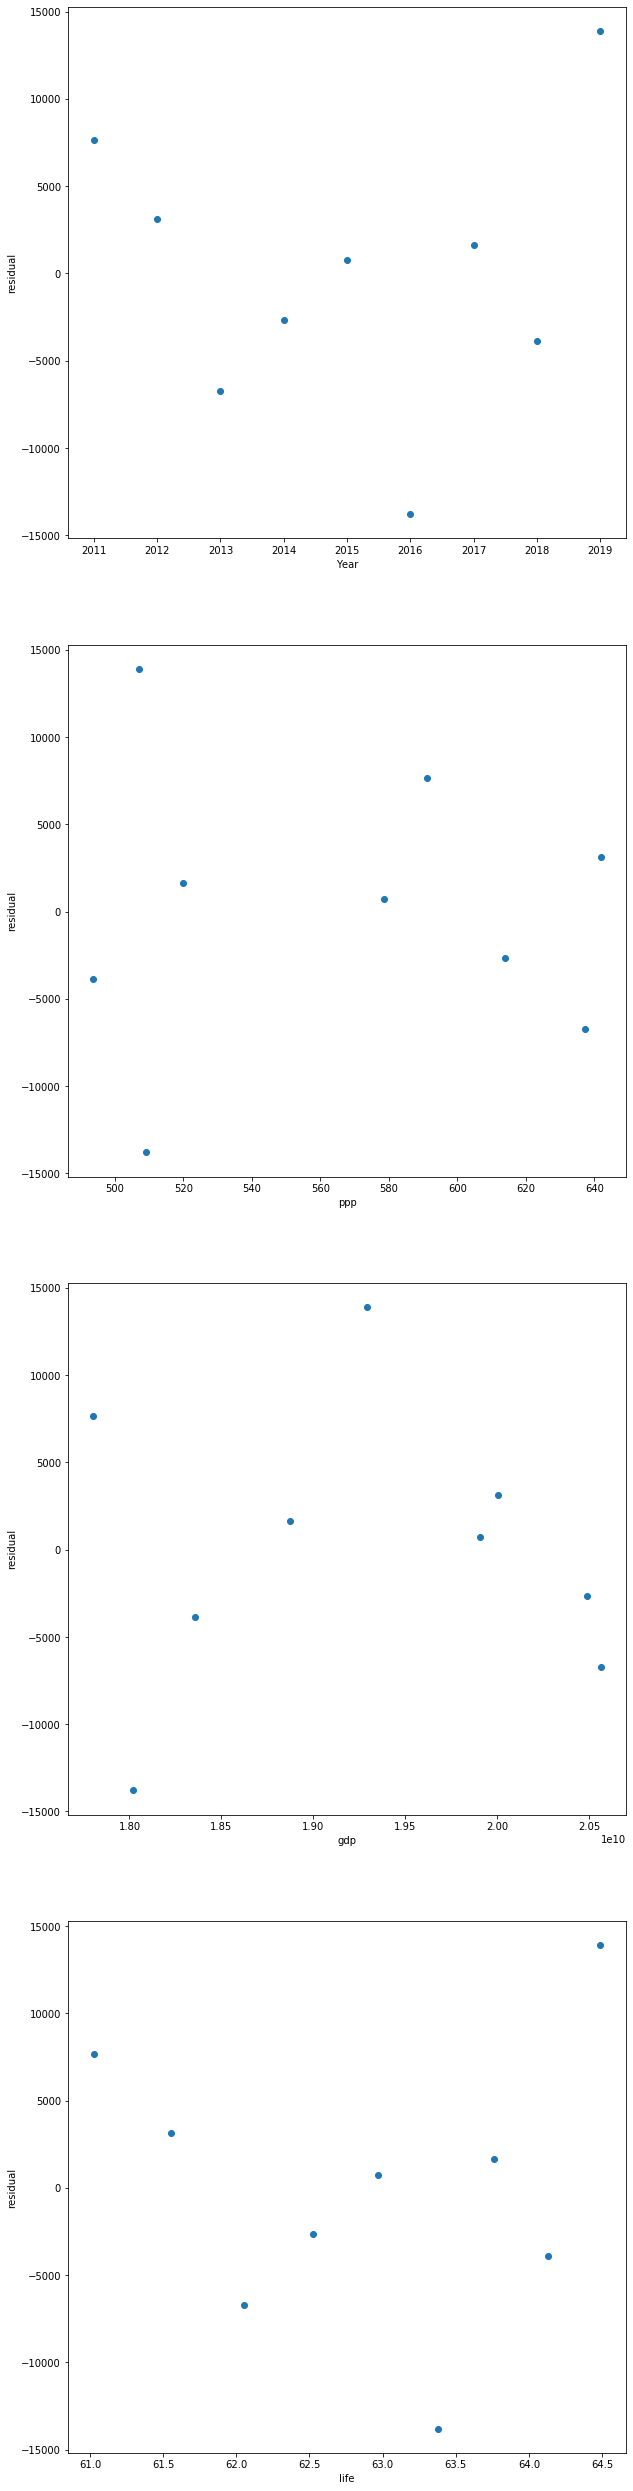

In [54]:
#TEST Assumptions and Adding nonlinear terms

fig, ax = plt.subplots(4,figsize =(10,45))
resid = results2.resid
for i in range(4): # for each of the nine variables
  # create a fitted plot for that variable ('i' indexes the variables)
  ax[i].scatter(X.iloc[:,i],resid) 
  ax[i].set_xlabel(X.columns[i]) 
  ax[i].set_ylabel("residual")

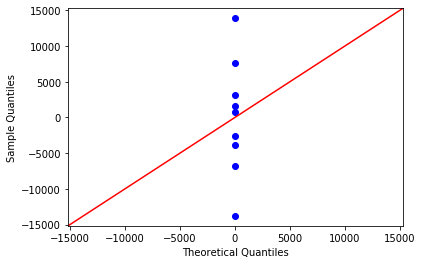

In [56]:
sm.qqplot(resid, line='45');